<a href="https://colab.research.google.com/github/DanielRaiicHu/challenge1-data-science-latam/blob/main/AluraStoreLatam.ipynb" target="_blank">
  <img src="https://github.com/DanielRaiicHu/challenge1-data-science-latam/raw/main/enlace-colab.svg" alt="Abrir en Colab" width="200">
</a>


### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
# Leer los archivos CSV
tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Calcular el ingreso total por tienda
def calcular_ingreso_total(tienda):
  """Calcula el ingreso total de una tienda sumando los valores de la columna 'Precio'."""
  return tienda['Precio'].sum()

ingreso_tienda1 = calcular_ingreso_total(tienda1)
ingreso_tienda2 = calcular_ingreso_total(tienda2)
ingreso_tienda3 = calcular_ingreso_total(tienda3)
ingreso_tienda4 = calcular_ingreso_total(tienda4)

# Mostrar resultados
print(f'Ingreso total Tienda 1: ${ingreso_tienda1:,.2f}')
print(f'Ingreso total Tienda 2: ${ingreso_tienda2:,.2f}')
print(f'Ingreso total Tienda 3: ${ingreso_tienda3:,.2f}')
print(f'Ingreso total Tienda 4: ${ingreso_tienda4:,.2f}')

Ingreso total Tienda 1: $1,150,880,400.00
Ingreso total Tienda 2: $1,116,343,500.00
Ingreso total Tienda 3: $1,098,019,600.00
Ingreso total Tienda 4: $1,038,375,700.00


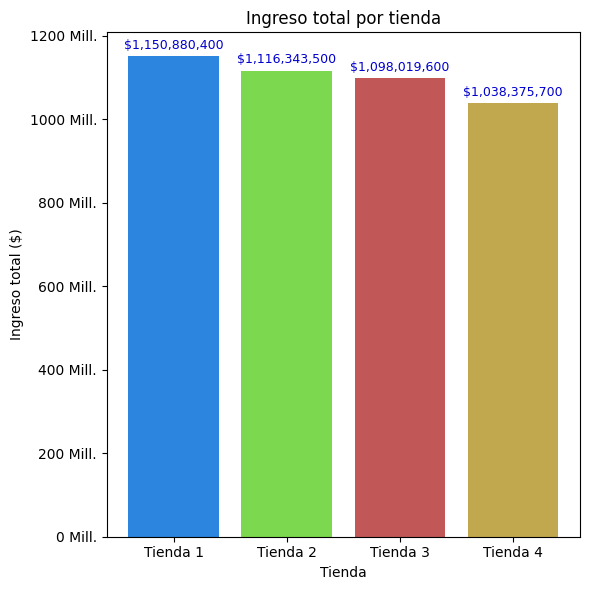

In [19]:
# Gráfico de Barras de los ingresos totales por cada tienda.

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Tonos de azul para las barras
colores = ['#2C85DE', '#7CD84E', '#C15757', '#C1A84F']

plt.figure(figsize=(6, 6))
barras = plt.bar(tiendas, ingresos, color=colores)

# Título y etiquetas de ejes
plt.title('Ingreso total por tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso total ($)')


def formato_abreviado(x, pos):
    if x >= 1e6: # verifica si el número x es mayor o igual a 1 millón
        s = f'{x / 1e6:.1f} Mill.'
    elif x >= 1e3: # esta línea verifica si el número x es mayor o igual a 1 mil
        s = f'{x / 1e3:.0f} Mil'
    else:
        s = f'{x:.0f}'
    return s

formatter = mtick.FuncFormatter(formato_abreviado)
plt.gca().yaxis.set_major_formatter(formatter)

# Eje Y en millones
formatter = mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f} Mill.')
plt.gca().yaxis.set_major_formatter(formatter)

# Agregar valores sobre cada barra, en azul Mario, sin negrita
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura + (altura * 0.01),  # un poco sobre la barra
        f"${int(altura):,}",
        ha='center',
        va='bottom',

        fontsize=9,
        color='#0000CD'  # azul estilo Mario fuerte
    )

plt.tight_layout()
plt.show()



# 2. Ventas por categoría

In [31]:
# Ventas por categoría y ver productos únicos por cada categoría.
import pandas as pd

# Unir todas las tiendas en un solo DataFrame
df_total = pd.concat([
    tienda1.assign(Tienda='Tienda 1'),
    tienda2.assign(Tienda='Tienda 2'),
    tienda3.assign(Tienda='Tienda 3'),
    tienda4.assign(Tienda='Tienda 4')
])

# Función para mostrar productos únicos por categoría
def mostrar_productos_por_categoria(productos_por_categoria):
    print("PRODUCTOS ÚNICOS POR CATEGORÍA")
    for categoria, productos in productos_por_categoria.items():
        print(f"\n* {categoria} ({len(productos)} productos únicos):")
        for prod in productos:
            print(f"   - {prod}")

# Obtener productos únicos por categoría
productos_por_categoria = df_total.groupby("Categoría del Producto")["Producto"].unique()

# Mostrar productos únicos por categoría
mostrar_productos_por_categoria(productos_por_categoria)

# Cantidad de productos vendidos por categoría y tienda
df_categorias = df_total.groupby(['Categoría del Producto', 'Tienda']).size().unstack(fill_value=0)
df_categorias["Total"] = df_categorias.sum(axis=1)
df_categorias.loc["Total por tienda"] = df_categorias.sum()

# Mostrar tabla resumen
print("\n::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::")
print("TOTAL DE PRODUCTOS VENDIDOS POR CATEGORÍA EN CADA TIENDA:\n")
print(df_categorias)

print("\n::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::")
print("TOTAL DE PRODUCTOS VENDIDOS POR CATEGORÍA EN TODAS LAS TIENDAS:\n")
print(df_categorias["Total"].to_string())


PRODUCTOS ÚNICOS POR CATEGORÍA

* Artículos para el hogar (4 productos únicos):
   - Olla de presión
   - Cubertería
   - Set de ollas
   - Set de vasos

* Deportes y diversión (6 productos únicos):
   - Bicicleta
   - Balón de voleibol
   - Vaso térmico
   - Cuerda para saltar
   - Mochila
   - Balón de baloncesto

* Electrodomésticos (6 productos únicos):
   - Microondas
   - Lavavajillas
   - Lavadora de ropa
   - Refrigerador
   - Estufa
   - Secadora de ropa

* Electrónicos (10 productos únicos):
   - Asistente virtual
   - Auriculares
   - TV LED UHD 4K
   - Impresora
   - Tablet ABXY
   - Iphone 15
   - Auriculares con micrófono
   - Celular ABXY
   - Smartwatch
   - Smart TV

* Instrumentos musicales (4 productos únicos):
   - Batería
   - Guitarra eléctrica
   - Guitarra acústica
   - Pandereta

* Juguetes (7 productos únicos):
   - Juego de mesa
   - Bloques de construcción
   - Muñeca bebé
   - Carrito de control remoto
   - Ajedrez de madera
   - Dinosaurio Rex
   - Cubo má

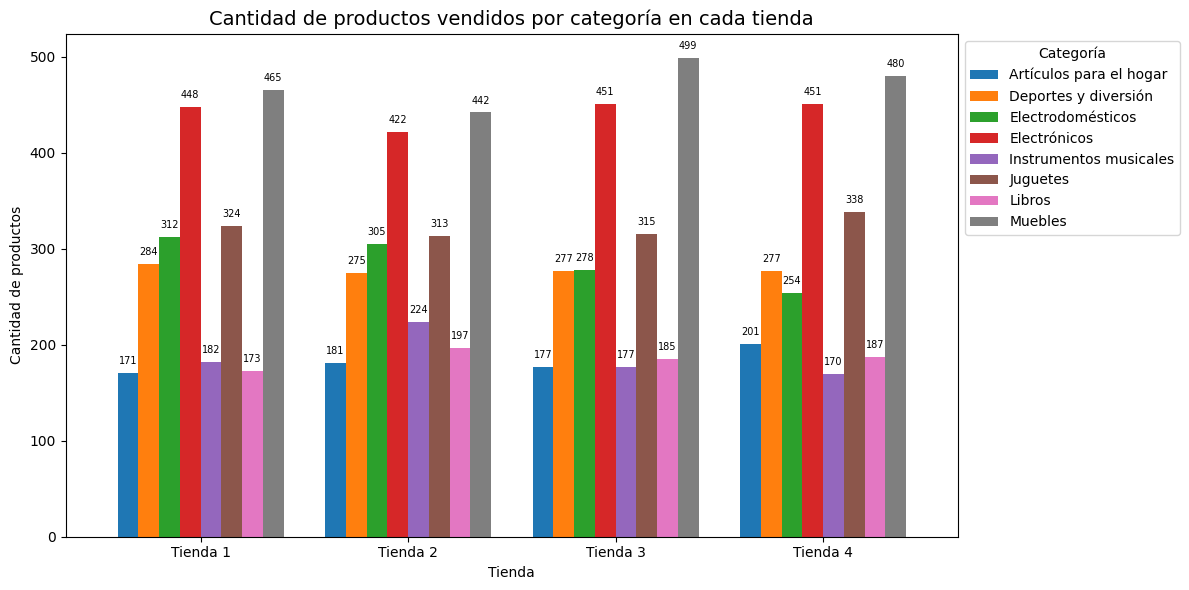

In [113]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar los datos por tienda y categoría, y sumar las cantidades
df_agrupado = df_resultados_final.groupby(['Tienda', 'Categoría'])['Cantidad'].sum().unstack()

# Crear el gráfico de barras
ax = df_agrupado.plot(kind='bar', figsize=(12, 6), width=0.8)  # Ajustar el ancho de las barras
plt.title('Cantidad de productos vendidos por categoría en cada tienda', fontsize=14)
plt.xlabel('Tienda')
plt.ylabel('Cantidad de productos')
plt.xticks(rotation=0)  # Para que las etiquetas del eje x no se roten
plt.legend(title='Categoría', bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)

# Añadir el valor sobre cada barra
for p in ax.patches:
    if p.get_height() > 100:  # Ocultar los números de las barras más pequeñas
        ax.annotate(f'{int(p.get_height())}',  # Formatear el valor como entero
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Posición del texto
                    ha='center', va='bottom',  # Alineación horizontal y vertical
                    xytext=(0, 5),  # Desplazamiento del texto (horizontal, vertical)
                    textcoords='offset points',
                    rotation=0,  # Rotación del texto (horizontal)
                    fontsize=7)  # Ajustar el tamaño de la fuente

plt.tight_layout()
plt.show()

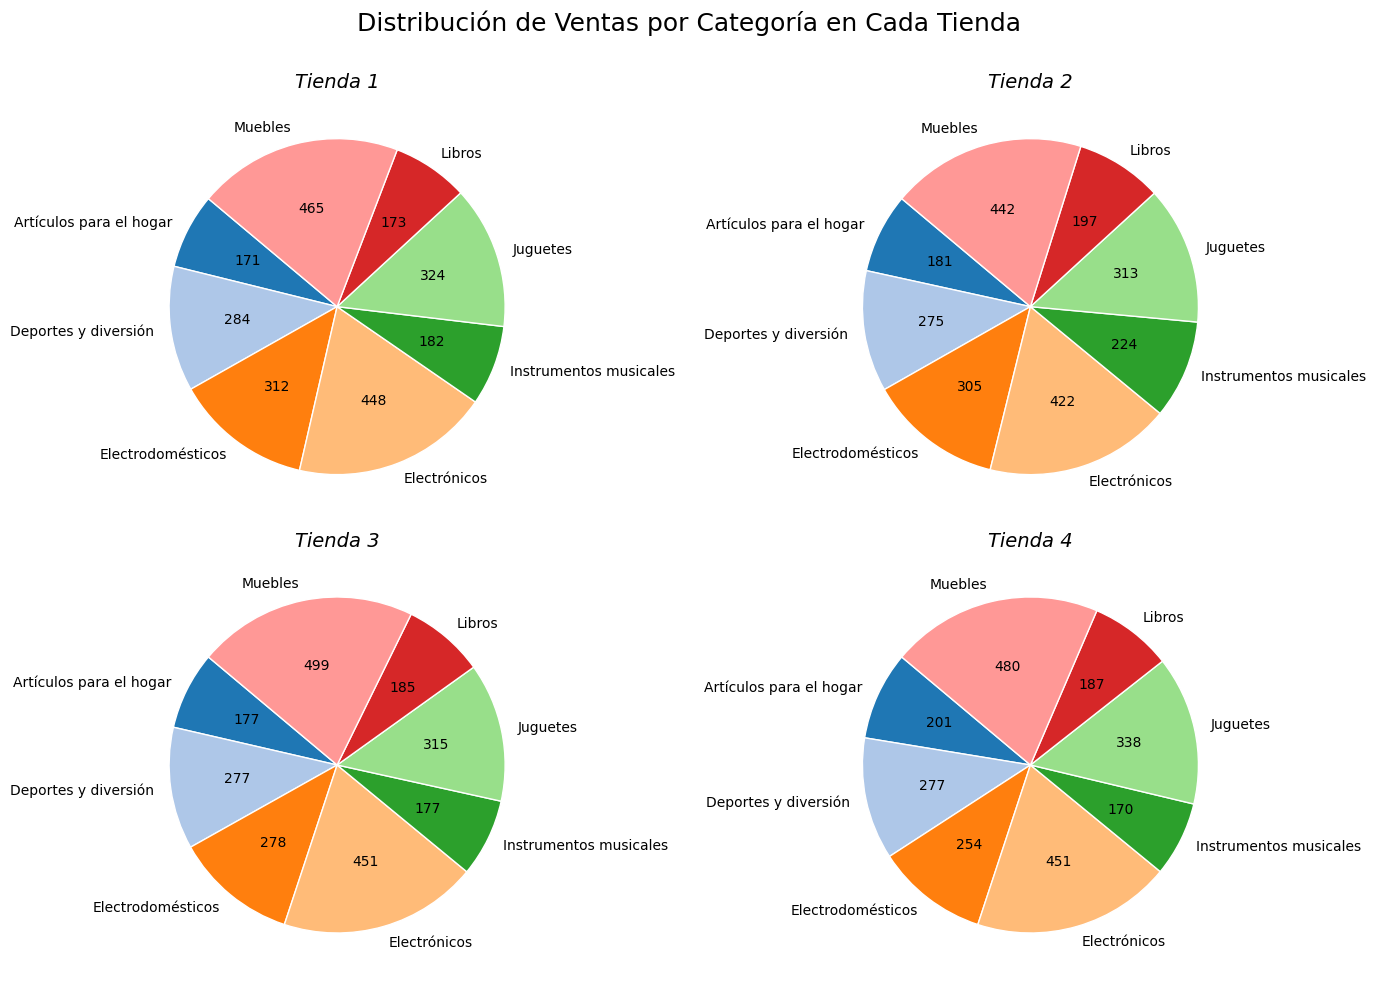

In [80]:
# Gráfico de Torta de Ventas por Categoría

import matplotlib.pyplot as plt

# Calcular categorias para cada tienda
cat1 = tienda1['Categoría del Producto'].value_counts()
cat2 = tienda2['Categoría del Producto'].value_counts()
cat3 = tienda3['Categoría del Producto'].value_counts()
cat4 = tienda4['Categoría del Producto'].value_counts()


# Agrupar conteos de cada tienda en un diccionario
conteos_tiendas = {
    "Tienda 1": cat1,
    "Tienda 2": cat2,
    "Tienda 3": cat3,
    "Tienda 4": cat4
}

# Obtener todas las categorías únicas para asegurar colores consistentes
categorias_globales = sorted(set(cat1.index) | set(cat2.index) | set(cat3.index) | set(cat4.index))

# Asignar colores únicos a cada categoría
colores_base = plt.cm.tab20.colors  # paleta de colores variada
colores_categorias = {cat: colores_base[i % len(colores_base)] for i, cat in enumerate(categorias_globales)}

# Crear figura y subplots


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

fig.suptitle('Distribución de Ventas por Categoría en Cada Tienda\n', fontsize=18)

for i, (nombre_tienda, conteo) in enumerate(conteos_tiendas.items()):
    # Asegurar que todas las categorías estén presentes, rellenando con 0 si falta alguna
    conteo_completo = pd.Series({cat: conteo.get(cat, 0) for cat in categorias_globales})
    colores = [colores_categorias[cat] for cat in conteo_completo.index]

    wedges, texts, autotexts = axes[i].pie(
        conteo_completo,
        labels=conteo_completo.index,
        autopct=lambda p: f'{int(round(p * conteo_completo.sum() / 100))}',  # muestra la cantidad
        startangle=140,
        colors=colores,
        textprops={'color': 'black'},
        wedgeprops={'edgecolor': 'white'}
    )
    axes[i].set_title(f'{nombre_tienda}', fontsize=14,fontstyle='italic')

plt.tight_layout()
plt.show()



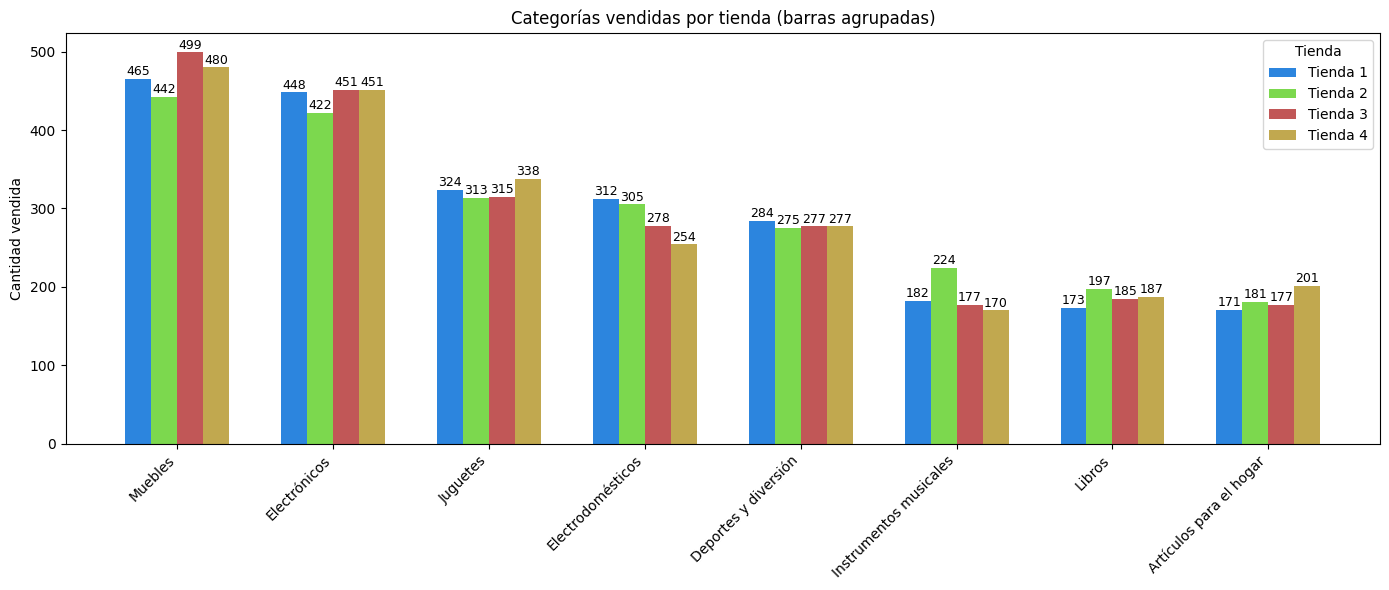

In [ ]:
# Gráfico de Barra del total vendido según categoría por cada tienda

import numpy as np
import matplotlib.pyplot as plt

df_plot = df_categorias
productos = df_plot.index
tiendas = df_plot.columns
width = 0.2
espacio = 0.4
x = np.arange(len(productos)) * (width * len(tiendas) + espacio)

colores = ['#2C85DE', '#7CD84E', '#C15757', '#C1A84F']

plt.figure(figsize=(14, 6))

for i, tienda in enumerate(tiendas):
    posiciones = x + i * width
    valores = df_plot[tienda].values
    barras = plt.bar(posiciones, valores, width=width, label=tienda, color=colores[i])

    # Etiquetas sobre las barras
    for bar in barras:
        altura = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, altura + 1, str(altura),
                 ha='center', va='bottom', fontsize=9)


plt.xticks(x + (width * (len(tiendas) - 1)) / 2, productos, rotation=45, ha='right')
plt.ylabel('Cantidad vendida')
plt.title('Categorías vendidas por tienda (barras agrupadas)')
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
promedio1 = tienda1['Calificación'].mean()
promedio2 = tienda2['Calificación'].mean()
promedio3 = tienda3['Calificación'].mean()
promedio4 = tienda4['Calificación'].mean()

print("Calificación promedio por tienda:")
print(f"Tienda 1: {promedio1:.2f}")
print(f"Tienda 2: {promedio2:.2f}")
print(f"Tienda 3: {promedio3:.2f}")
print(f"Tienda 4: {promedio4:.2f}")

Calificación promedio por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


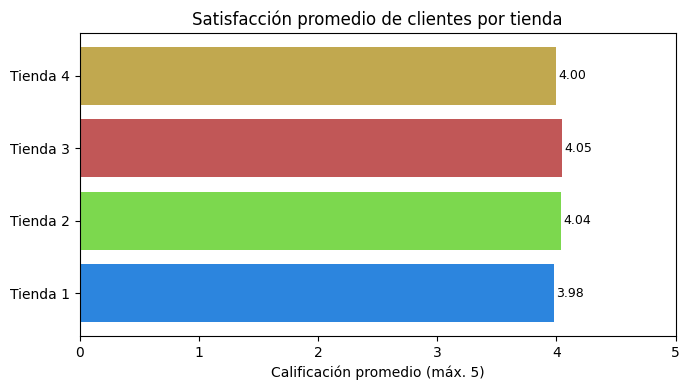

In [ ]:
# Gráfico de Barras del promedio en satisfacción al clientes por cada tienda.

import matplotlib.pyplot as plt

# Promedios (estos valores deben haber sido calculados previamente)
calificaciones = [promedio1, promedio2, promedio3, promedio4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Colores tipo "satisfacción" (opcional: verdes/amarillos)
colores = ['#2C85DE', '#7CD84E', '#C15757', '#C1A84F']

plt.figure(figsize=(7, 4))
barras = plt.barh(tiendas, calificaciones, color=colores)

# Mostrar valores sobre las barras
for barra in barras:
    ancho = barra.get_width()
    plt.text(ancho + 0.02, barra.get_y() + barra.get_height()/2,
             f'{ancho:.2f}', va='center', fontsize=9)

plt.xlim(0, 5)  # escala de 0 a 5 estrellas
plt.xlabel('Calificación promedio (máx. 5)')
plt.title('Satisfacción promedio de clientes por tienda')
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
# Productos más y menos vendidos

def mostrar_top_y_bottom(df, nombre_tienda):
    conteo = df['Producto'].value_counts()
    top = conteo.head(1)
    bottom = conteo.tail(1)

    print(f"\n{nombre_tienda}")
    print(f"Más vendido: {top.index[0]} ({top.values[0]} ventas)")
    print(f"Menos vendido: {bottom.index[0]} ({bottom.values[0]} venta{'s' if bottom.values[0] > 1 else ''})")
    print("\n::::::::::::::::::::::::::::::::::::::::::::::::::::")

mostrar_top_y_bottom(tienda1, "Tienda 1")
mostrar_top_y_bottom(tienda2, "Tienda 2")
mostrar_top_y_bottom(tienda3, "Tienda 3")
mostrar_top_y_bottom(tienda4, "Tienda 4")



Tienda 1
Más vendido: Microondas (60 ventas)
Menos vendido: Celular ABXY (33 ventas)

::::::::::::::::::::::::::::::::::::::::::::::::::::

Tienda 2
Más vendido: Iniciando en programación (65 ventas)
Menos vendido: Juego de mesa (32 ventas)

::::::::::::::::::::::::::::::::::::::::::::::::::::

Tienda 3
Más vendido: Kit de bancas (57 ventas)
Menos vendido: Bloques de construcción (35 ventas)

::::::::::::::::::::::::::::::::::::::::::::::::::::

Tienda 4
Más vendido: Cama box (62 ventas)
Menos vendido: Guitarra eléctrica (33 ventas)

::::::::::::::::::::::::::::::::::::::::::::::::::::


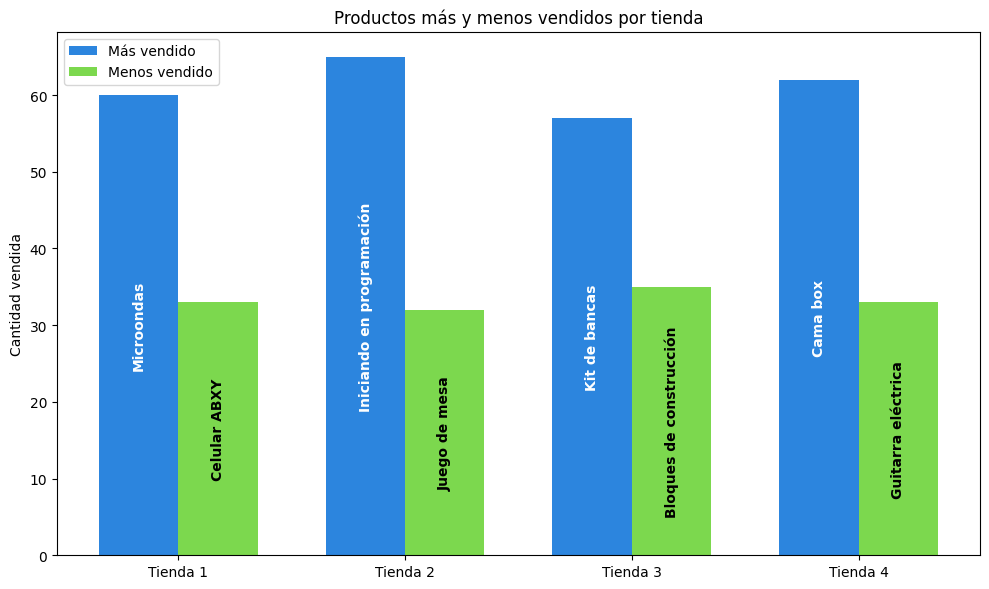

In [ ]:
# Gráfico de Barras de los productos más y menos vendidos por cada tienda.

import matplotlib.pyplot as plt
import numpy as np

# Recopilamos los datos de la función
tiendas = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

nombres_tienda = []
productos_mas = []
productos_menos = []
cantidades_mas = []
cantidades_menos = []

for nombre, df in tiendas.items():
    conteo = df['Producto'].value_counts()
    top = conteo.head(1)
    bottom = conteo.tail(1)

    nombres_tienda.append(nombre)
    productos_mas.append(top.index[0])
    cantidades_mas.append(top.values[0])
    productos_menos.append(bottom.index[0])
    cantidades_menos.append(bottom.values[0])

# Creamos el gráfico
x = np.arange(len(nombres_tienda))
width = 0.35

plt.figure(figsize=(10, 6))

# Colores personalizados
color_mas = '#2C85DE'
color_menos = '#7CD84E'

# Barras
barras_mas = plt.bar(x - width/2, cantidades_mas, width=width, color=color_mas, label='Más vendido')
barras_menos = plt.bar(x + width/2, cantidades_menos, width=width, color=color_menos, label='Menos vendido')

# Etiquetas dentro de las barras
for i in range(len(nombres_tienda)):



    # Dentro del más vendido
    plt.text(x[i] - width/2, cantidades_mas[i] / 2, productos_mas[i],
             ha='center', va='center', fontsize=10, color='white', fontweight='bold', rotation=90)

    # Dentro del menos vendido
    plt.text(x[i] + width/2, cantidades_menos[i] / 2, productos_menos[i],
             ha='center', va='center', fontsize=10, color='black', fontweight='bold', rotation=90)



plt.xticks(x, nombres_tienda)
plt.ylabel('Cantidad vendida')
plt.title('Productos más y menos vendidos por tienda')
plt.legend()
plt.tight_layout()
plt.show()




# 5. Envío promedio por tienda

In [ ]:
# Envío promedio por tienda
def costo_envio_promedio(df, nombre_tienda):
    promedio = df['Costo de envío'].mean()
    print(f"{nombre_tienda}: ${promedio:,.2f} promedio de envío")
    return promedio

# Calcular y mostrar
envio1 = costo_envio_promedio(tienda1, "Tienda 1")
envio2 = costo_envio_promedio(tienda2, "Tienda 2")
envio3 = costo_envio_promedio(tienda3, "Tienda 3")
envio4 = costo_envio_promedio(tienda4, "Tienda 4")

Tienda 1: $26,018.61 promedio de envío
Tienda 2: $25,216.24 promedio de envío
Tienda 3: $24,805.68 promedio de envío
Tienda 4: $23,459.46 promedio de envío


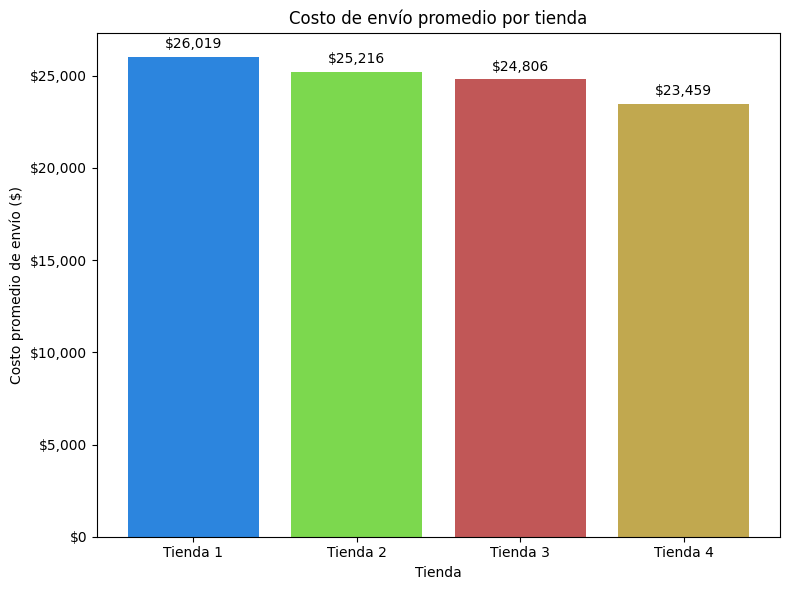

In [ ]:
# Gráfico de Barras de Costo de envío promedio por tienda.

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Datos
envios = [envio1, envio2, envio3, envio4]
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
colores = ['#2C85DE', '#7CD84E', '#C15757', '#C1A84F']

# Crear gráfico
plt.figure(figsize=(8, 6))
barras = plt.bar(tiendas, envios, color=colores)

# Agregar valores sobre cada barra
for barra, valor in zip(barras, envios):
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width()/2,
        altura + 300,  # separación encima de la barra
        f"${valor:,.0f}",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Formato del eje Y en miles
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Títulos y etiquetas
plt.title("Costo de envío promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo promedio de envío ($)")
plt.tight_layout()
plt.show()
